In [2]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brsahan/vehicle-co2-emissions-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\giwon\.cache\kagglehub\datasets\brsahan\vehicle-co2-emissions-dataset\versions\1


In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('co2.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


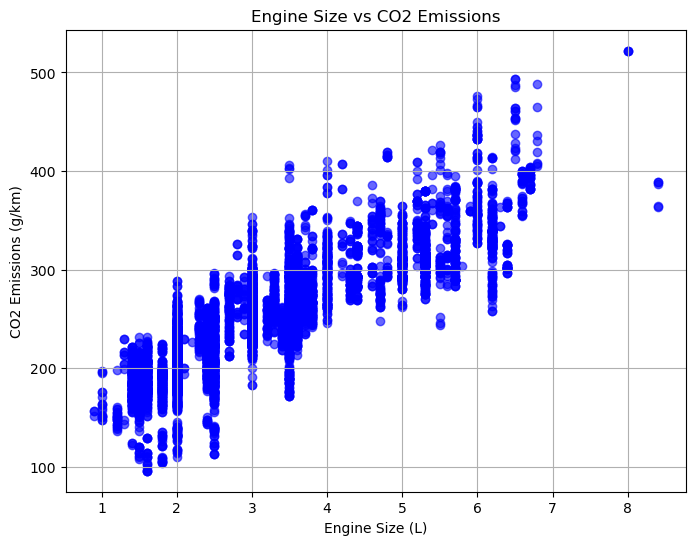

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'], color='blue', alpha=0.6)
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Engine Size vs CO2 Emissions')
plt.grid(True)
plt.show()


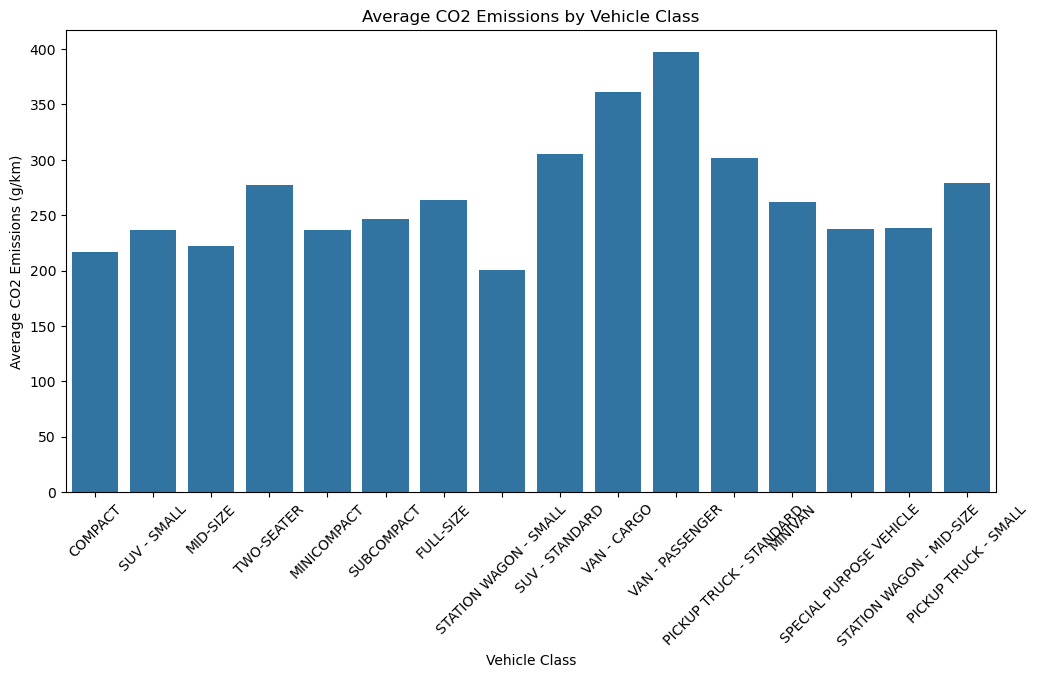

In [14]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=df, errorbar=None, estimator='mean')
plt.xlabel('Vehicle Class')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.xticks(rotation=45)
plt.title('Average CO2 Emissions by Vehicle Class')
plt.show()


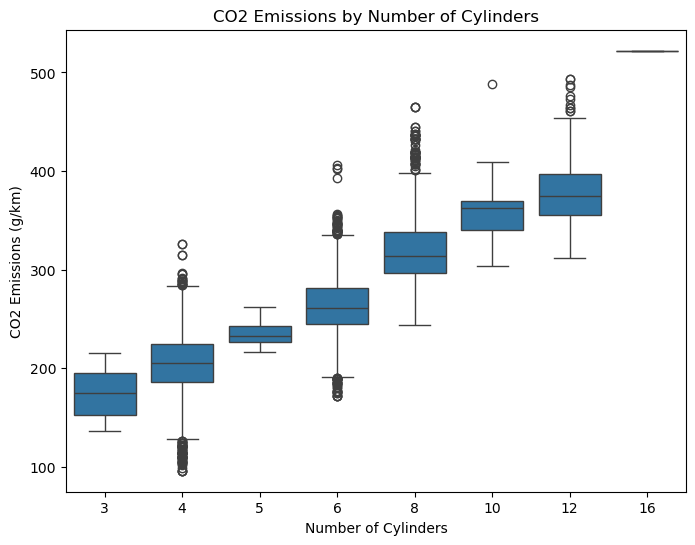

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cylinders', y='CO2 Emissions(g/km)', data=df)
plt.xlabel('Number of Cylinders')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('CO2 Emissions by Number of Cylinders')
plt.show()


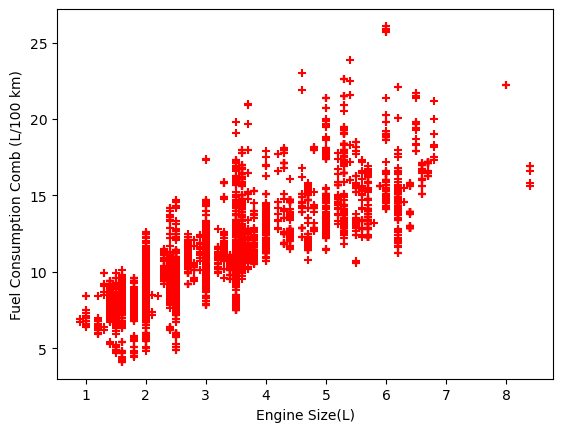

In [18]:
%matplotlib inline
plt.xlabel('Engine Size(L)')
plt.ylabel('Fuel Consumption Comb (L/100 km)')
plt.scatter(df['Engine Size(L)'],df['Fuel Consumption Comb (L/100 km)'],color='red',marker='+')
plt.show()

In [30]:
engine_size = df['Engine Size(L)'].to_frame()
engine_size.head()

consumption = df['Fuel Consumption Comb (L/100 km)']

reg = linear_model.LinearRegression()
reg.fit(engine_size.values, consumption)

print("Coefficient: ", reg.coef_)
print("Interception: ", reg.intercept_)

reg.predict([[22]])


Coefficient:  [1.74523907]
Interception:  5.459997482021444


array([43.85525692])